# 2.4 Removing Power Line Noise in an ECG Signal

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal

### Task 1
Read csv file

In [149]:
ecg_df = pd.read_csv("ecg_signal.csv", header=None)
ecg_df

,0
0,-19.9470
1,-18.1850
2,-22.7270
3,-30.3970
4,-35.9250
...,...
3595,-7.5950
3596,-15.3650
3597,-16.5060
3598,-12.2480


In [150]:
ecg = ecg_df[0].values.tolist()
ecg

[-19.947,
 -18.185,
 -22.727,
 -30.397,
 -35.925,
 -35.51,
 -29.377,
 -21.686,
 -19.776,
 -22.515,
 -30.181,
 -36.456,
 -34.067,
 -28.616,
 -21.832,
 -15.073,
 -17.706,
 -23.738,
 -31.347,
 -32.119,
 -25.892,
 -17.485,
 -10.895,
 -9.0193,
 -15.965,
 -21.771,
 -23.949,
 -20.319,
 -11.486,
 -2.9646,
 0.68181,
 0.012699,
 -7.9965,
 -10.726,
 -5.8264,
 4.4164,
 15.933,
 23.39,
 19.967,
 12.712,
 12.48,
 15.79,
 27.53,
 40.933,
 47.934,
 47.562,
 44.173,
 39.819,
 43.868,
 55.056,
 65.908,
 72.984,
 71.595,
 68.5,
 61.603,
 63.609,
 67.891,
 80.556,
 85.347,
 89.177,
 82.001,
 75.015,
 73.875,
 76.705,
 83.699,
 91.191,
 88.662,
 79.849,
 69.86,
 62.286,
 58.318,
 64.546,
 68.925,
 67.263,
 55.848,
 43.713,
 29.59,
 26.895,
 28.533,
 33.842,
 31.843,
 25.557,
 14.25,
 4.8995,
 0.87802,
 1.9935,
 8.8354,
 13.97,
 10.652,
 -0.42597,
 -8.3806,
 -12.448,
 -7.1822,
 -1.4594,
 5.4049,
 4.2512,
 -2.9822,
 -11.043,
 -17.2,
 -11.312,
 -4.2412,
 4.2724,
 1.685,
 -3.212,
 -12.226,
 -14.738,
 -14.615,


In [151]:
duration = 10 #  seconds
T = duration/len(ecg)
Fs = 1/T

In [152]:
# Obtaining the fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

## Task 2
plot absolute value of FT wrt freq

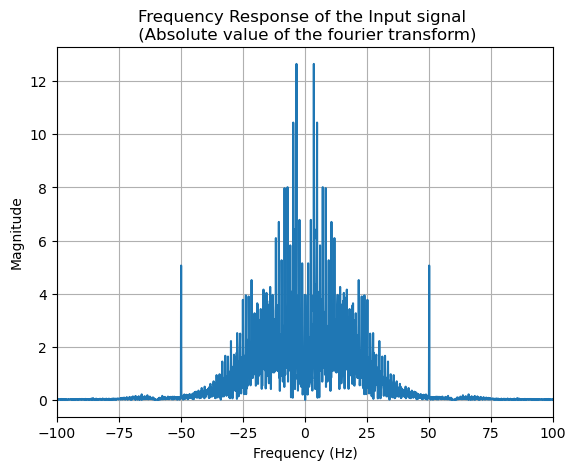

In [153]:
fig, ax = plt.subplots()
ax.plot(fr,abs(F)/len(ecg))
ax.set_title('Frequency Response of the Input signal \n (Absolute value of the fourier transform)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
# ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
# ax.set_xticklabels([(str(i)+(r'$\pi$' if i else '')) for i in range(-1200,1210,400)])
ax.set_xlim(-100, 100)
# ax.set_yticks([0,np.pi/2,np.pi])
# ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

## Task 3 
What filter can be used to remove noise at 50 Hz? \
band stop filter 

## Task 4


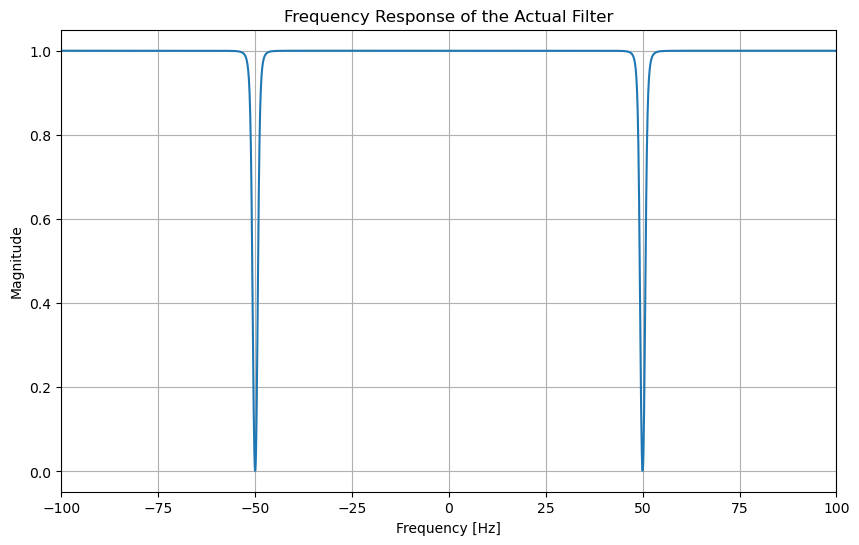

In [154]:
# Designing the filter
f1 = 49
f2 = 51
filter_type = 'bandstop' # EDIT HERE
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)
# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)

# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()


## Task 5
plot input and outputwaveforms vs time

In [155]:
time = np.arange(T, duration+T, T)
# Filtering the ECG wavefoem
output = signal.lfilter(b, a, ecg)

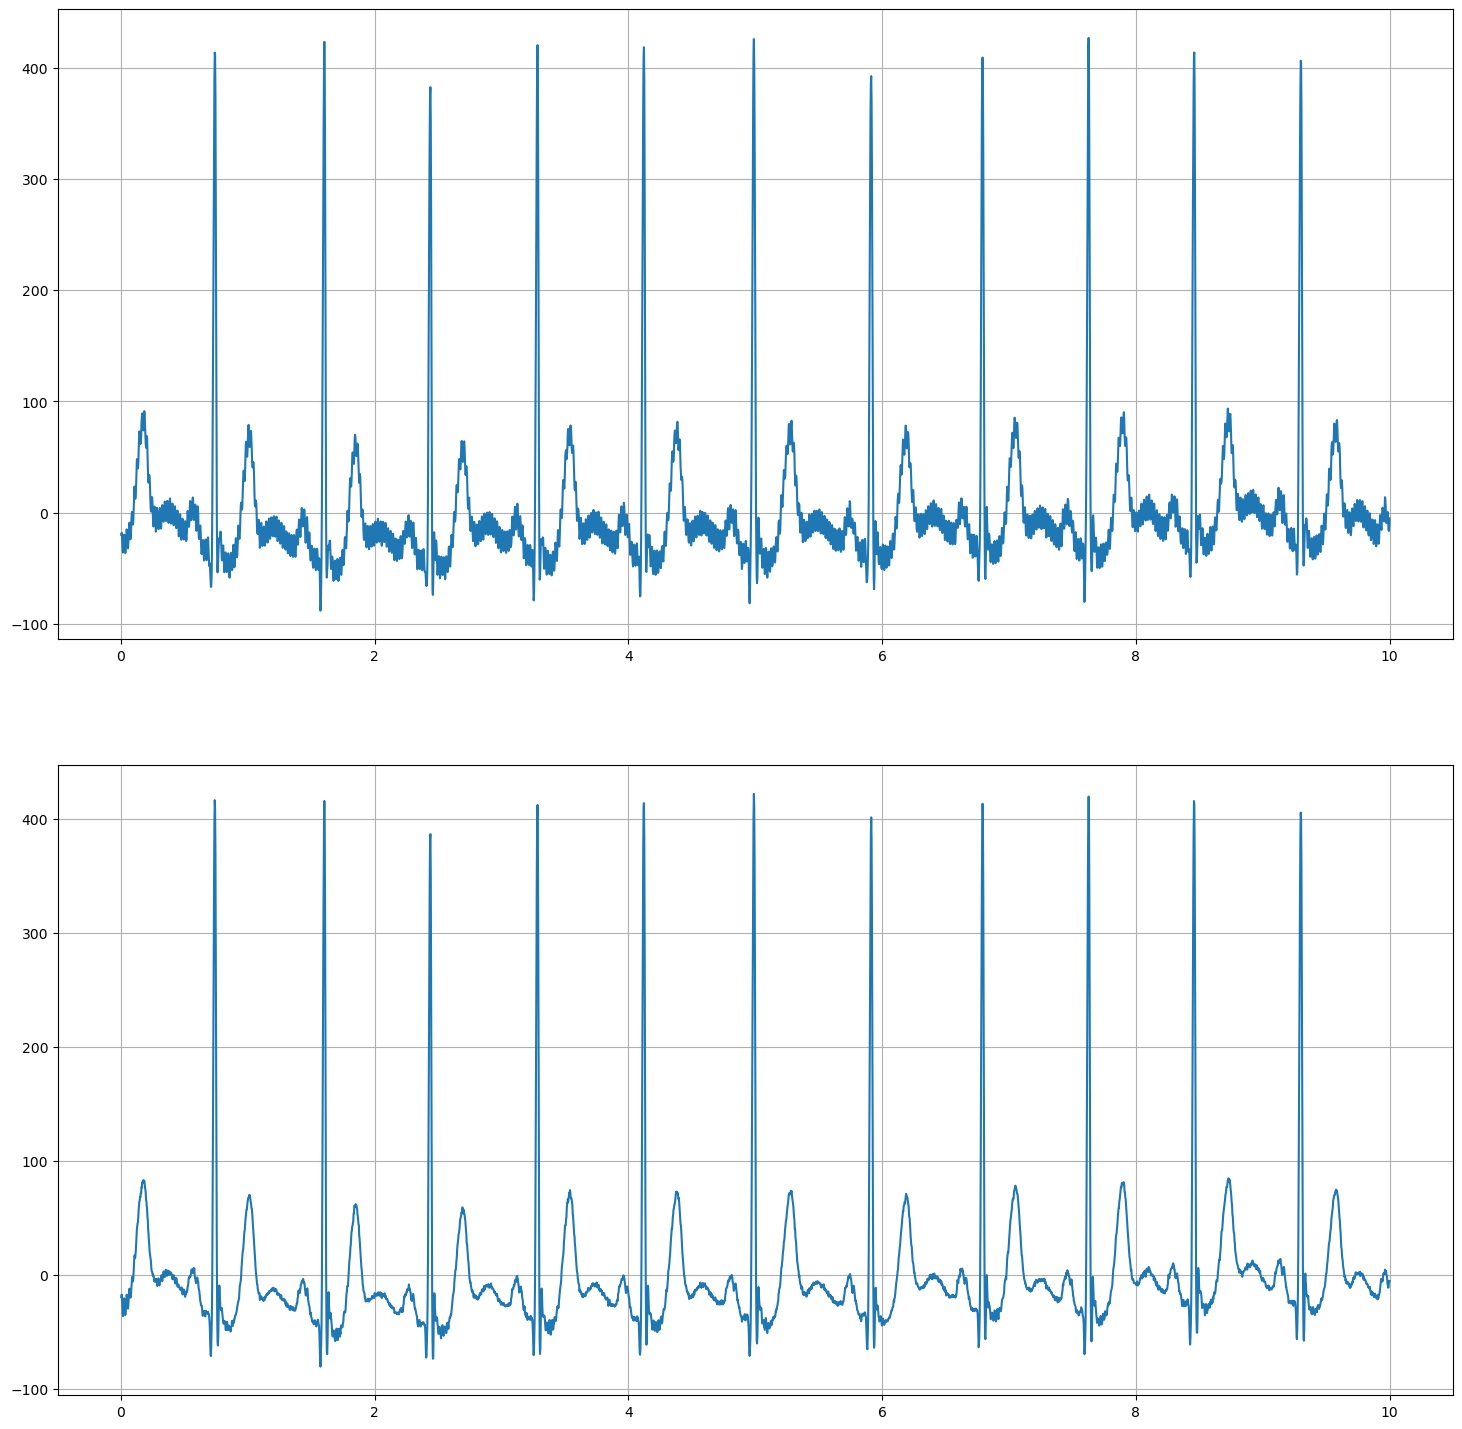

In [156]:
# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(2,1, figsize=(18,18))
axes[0].plot(time,ecg)
# axes[0].set_title('Frequency Response of the Ideal Filter')
# axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
# axes[0].set_ylabel('Magnitude')
# axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
# axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
# axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

# Frequency response of the ideal filter output (magnitude)
axes[1].plot(time,output)
# axes[1].set_title('Fourier Transform of the Output Signal')
# axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
# axes[1].set_ylabel('Magnitude')
# axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
# axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
# axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
# axes[1].set_yticks([0,np.pi/2,np.pi])
# axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

## Task 6
absolute value of the FT of output

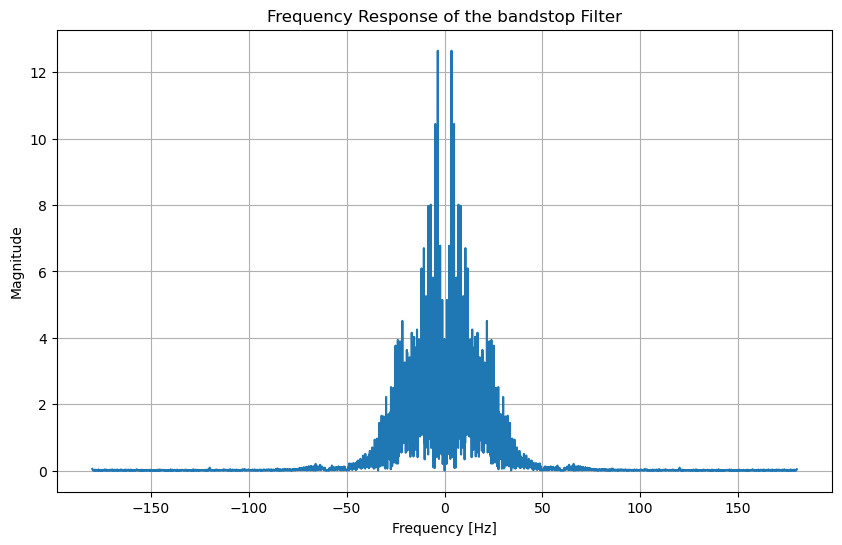

In [159]:
F = fftshift(fft(output))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fr, abs(F)/len(ecg))
ax.set_title('Frequency Response of the bandstop Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.grid()